In [8]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', delim_whitespace=True, header=None)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5660\979576324.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
df.shape

(210, 8)

In [10]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [11]:
df = df.rename(columns={0: 'area',1: 'perimeter',2: 'compactness',3: 'length_of_kernel',4: 'width_of_kernel',5: 'asymmetry_coefficient',6: 'length_of_kernel_groove',7: 'class'})
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [14]:
df.drop('class', axis=1, inplace=True)

In [15]:
x=df.iloc[:]
x

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Scaling the data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
        -9.86151745e-01, -3.83577423e-01,  1.35126668e+00],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
        -1.78816620e+00, -9.22013487e-01,  1.35126668e+00],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
        -6.67479334e-01, -1.18919199e+00,  1.35126668e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
         3.07658816e+00, -7.18060432e-01, -1.06376313e+00],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -6.81351965e-02, -7.42534799e-01, -1.06376313e+00],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
         1.29122264e+00, -7.03783718e-01, -1.06376313e+00]])

In [22]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,label
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1.351267
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1.351267
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1.351267
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1.351267
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1.351267


In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

In [24]:
wcss

[2863.8762197017622,
 1135.2245000154073,
 603.6348724180523,
 538.858505427564,
 419.93561234838364,
 348.94487298504396,
 321.23474987913966,
 247.2511393792264,
 225.60195848830546,
 216.93354219420516]

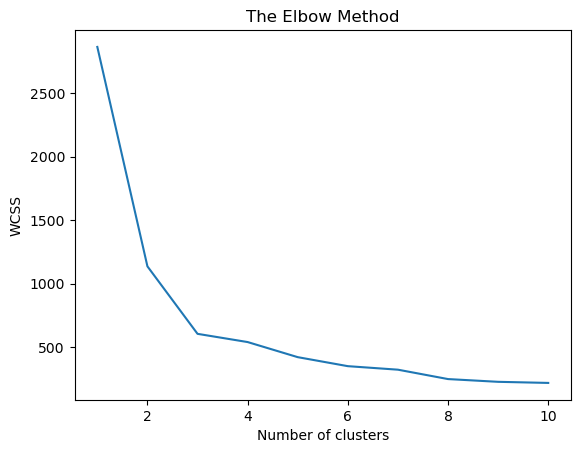

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(x_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


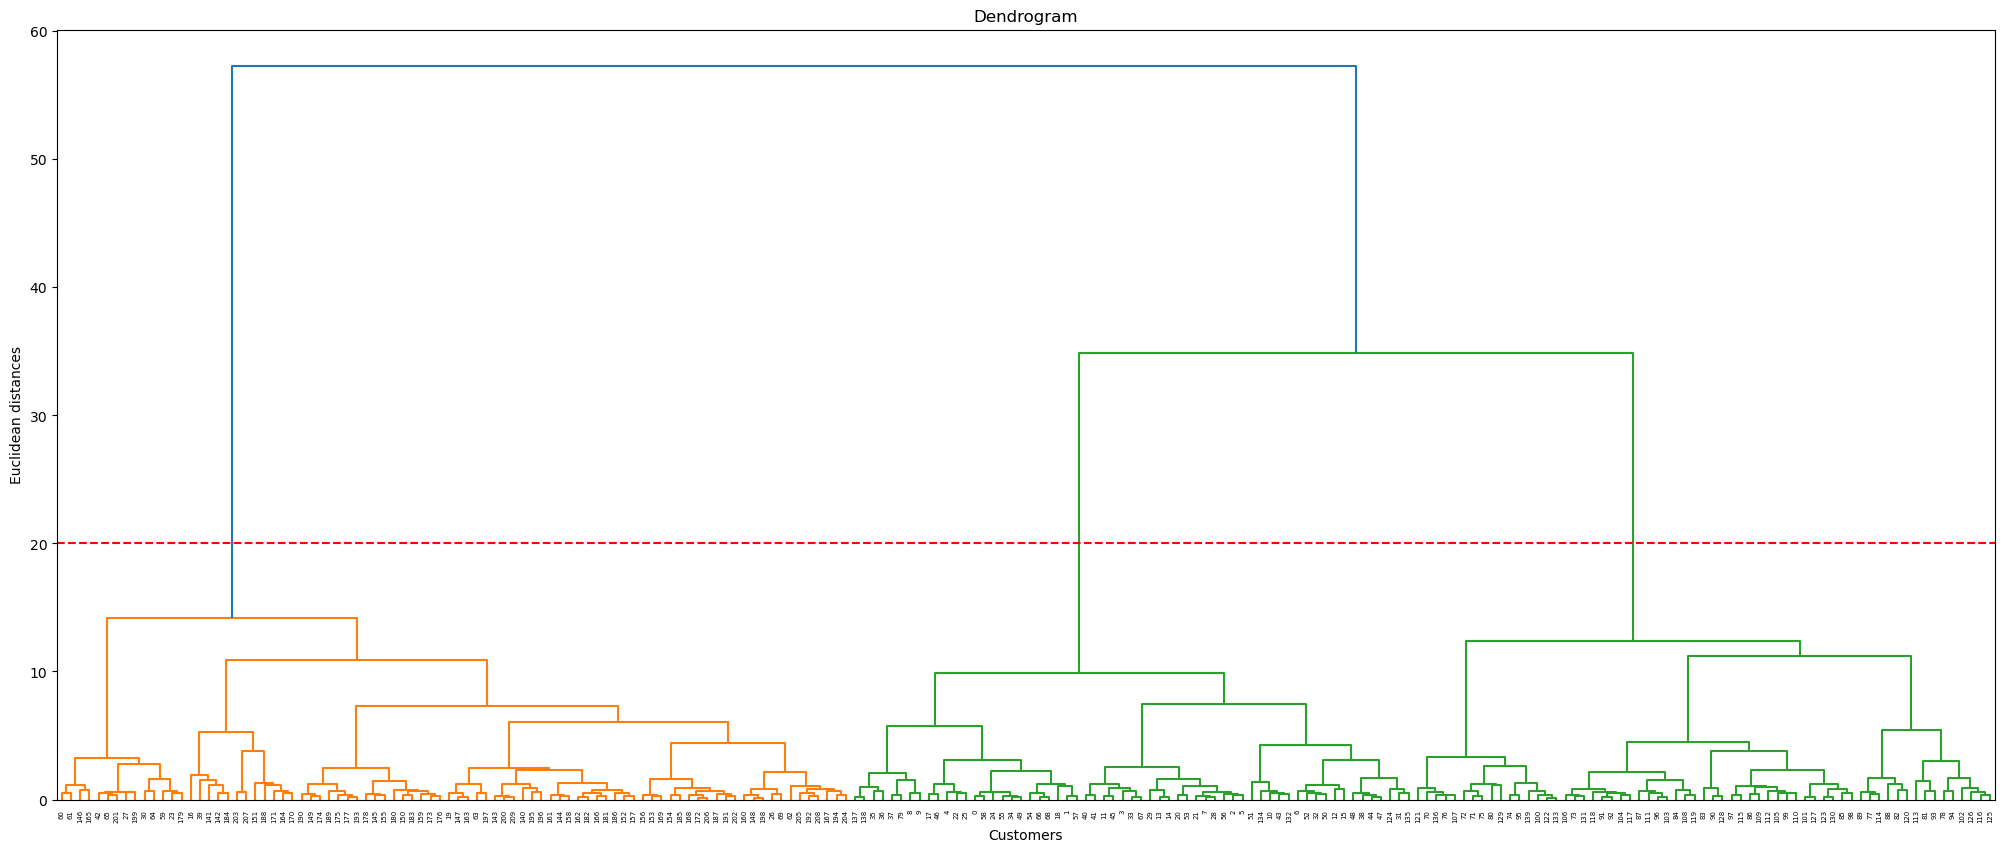

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.axhline(y=20, color='r',linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threeshold.
No. of cluster=3

In [31]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)  
agglo_labels = agglo.fit_predict(x_scaled)

PCA

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [33]:
x_pca=pd.DataFrame(data=x_pca, columns=['PCA1','PCA2'])
x_pca['KMeans_Cluster']=kmeans_labels
x_pca['Agglo_Cluster']=agglo_labels
x_pca.head()

,PCA1,PCA2,KMeans_Cluster,Agglo_Cluster
0,0.676148,-1.311334,2,2
1,0.398230,-2.331057,2,2
2,-0.047749,-2.343036,2,2
3,-0.173711,-2.398681,2,2
4,1.469113,-2.266695,2,2


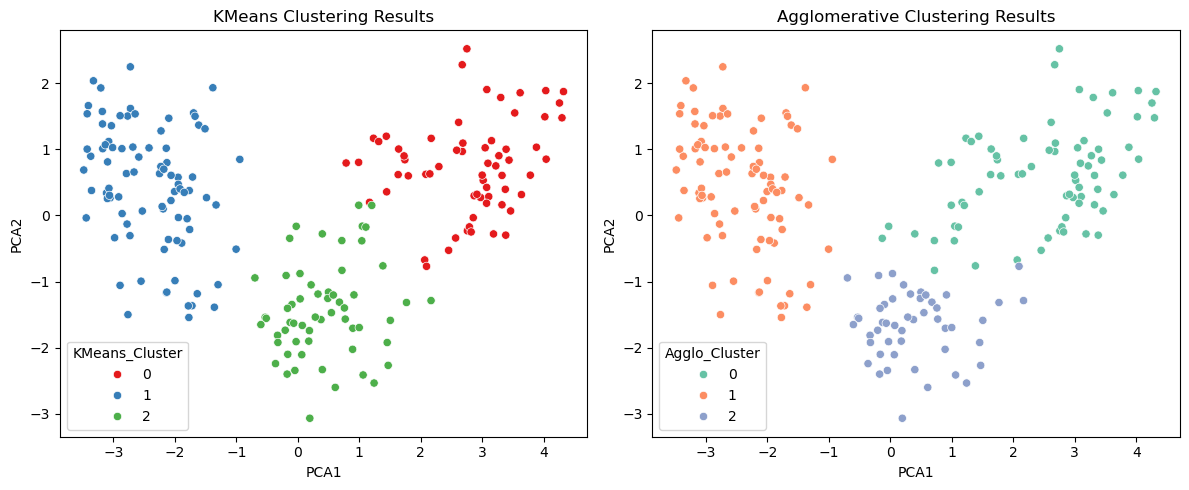

In [34]:
import seaborn as sns
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=x_pca, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1')
plt.title("KMeans Clustering Results")

plt.subplot(1,2,2)
sns.scatterplot(data=x_pca, x='PCA1', y='PCA2', hue='Agglo_Cluster', palette='Set2')
plt.title("Agglomerative Clustering Results")

plt.tight_layout()
plt.show()